# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

In [138]:
import numpy as np
import math
from scipy import integrate 
import matplotlib.pyplot as plt
%matplotlib notebook



## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

Code the equations into a function 

In [209]:
v=300
ang=50*(math.pi/180)
vx=v*math.cos(ang)
vy=v*math.sin(ang)
g=9.8
vol=math.pi*(.15**3)*(4/3)
p=7800
mass=vol*p
t0=0.0
tf=3.5
n=100
t = np.linspace(t0,tf,n)
x0 = np.array([0.0,vx])
y0= np.array([0.0,vy])

In [210]:
#define projectile motion function in vaccum
#def proj_vac
def v_x(t,x):
    return np.array( [x[1], x[0]])

def v_y(t,y,g):
    return np.array( [y[1], -1*(g)] )


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [211]:
#code
solx_RK45 = integrate.solve_ivp(v_x,(t0,tf),x0,method='RK45',t_eval=t)
soly_RK45 = integrate.solve_ivp(v_y,(t0,tf),y0,method='RK45',t_eval=t, args=[g])


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


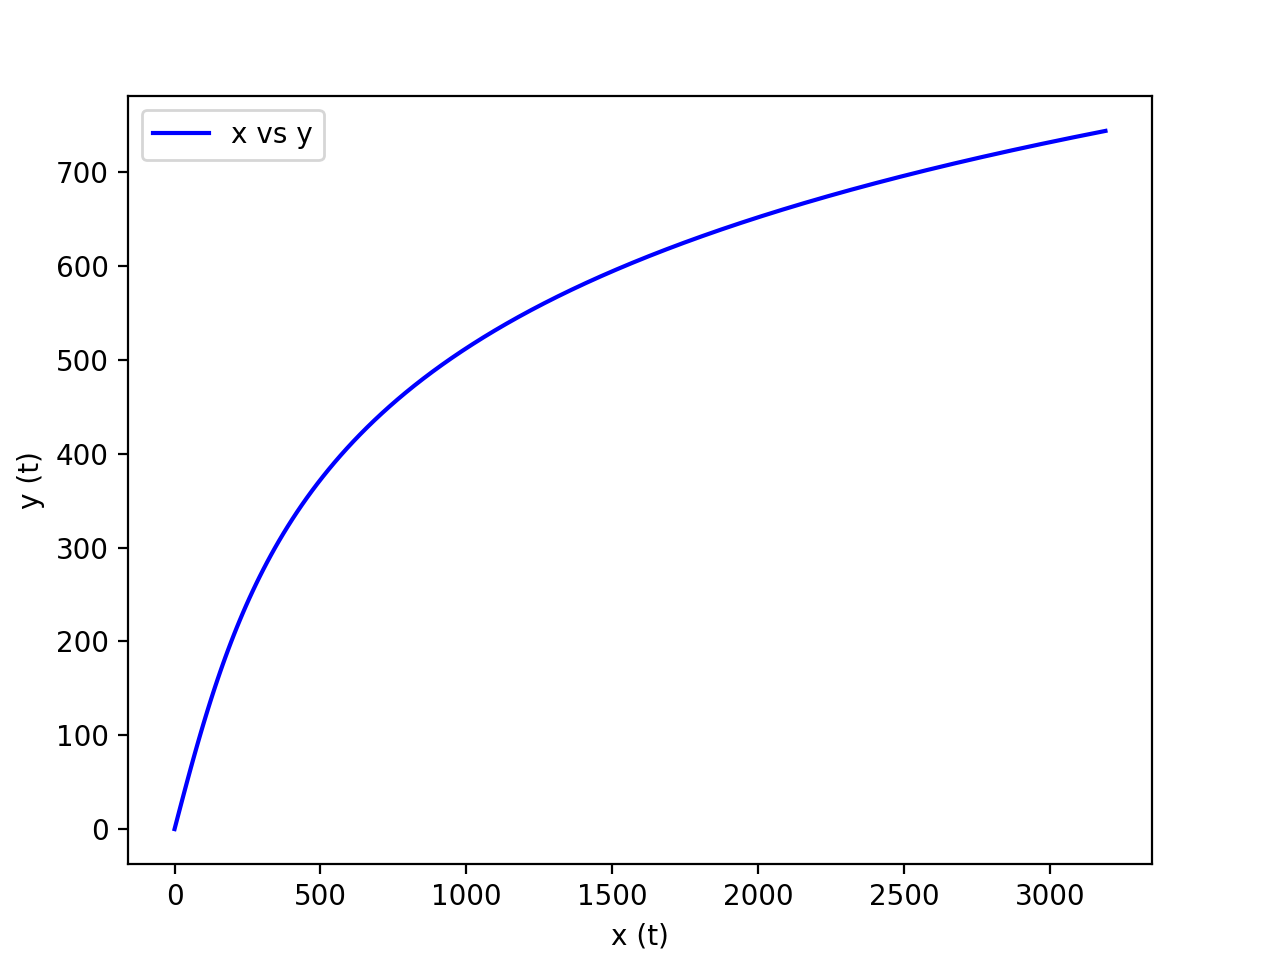

674.9269901708664 meters


In [212]:
#codes
fig = plt.figure('x vs y')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(solx_RK45.y[0],soly_RK45.y[0],'b', label='x vs y')
ax.legend(loc='best')
ax.set_xlabel('x (t)')
ax.set_ylabel('y (t)')
x_range = vx*3.5
print(x_range, 'meters')

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [214]:
#codes
def rungekutta_x(f,t,x0):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0  
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        x[i+1]= x[i] + (dt/6.0)*(f(t[i],x[i]) + 2.0*f(t[i] + dt/2.0, x[i] + (dt/2.0)*f(t[i],x[i])) + 2.0*f(t[i] + dt/2.0, x[i] + (dt/2.0)*f(t[i] + dt/2.0, x[i] + (dt/2.0)*f(t[i],x[i]))) + f(t[i] + dt, x[i] + dt*f(t[i] + dt/2.0, x[i] + (dt/2.0)*f(t[i] + dt/2.0, x[i] + (dt/2.0)*f(t[i],x[i])))))
    return x
def rungekutta_y(f,t,y0,args=()):
    n = len(t)
    y = np.zeros( ( n, len(y0) ) )
    y[0] = y0 
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        y[i+1]= y[i] + (dt/6.0)*(f(t[i], y[i], *args) + 2.0*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i],y[i],*args),*args) + 2.0*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i],y[i],*args),*args),*args) + f(t[i] + dt, y[i] + dt*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i] + dt/2.0, y[i] + (dt/2.0)*f(t[i],y[i],*args),*args),*args),*args))
    return y

<IPython.core.display.Javascript object>


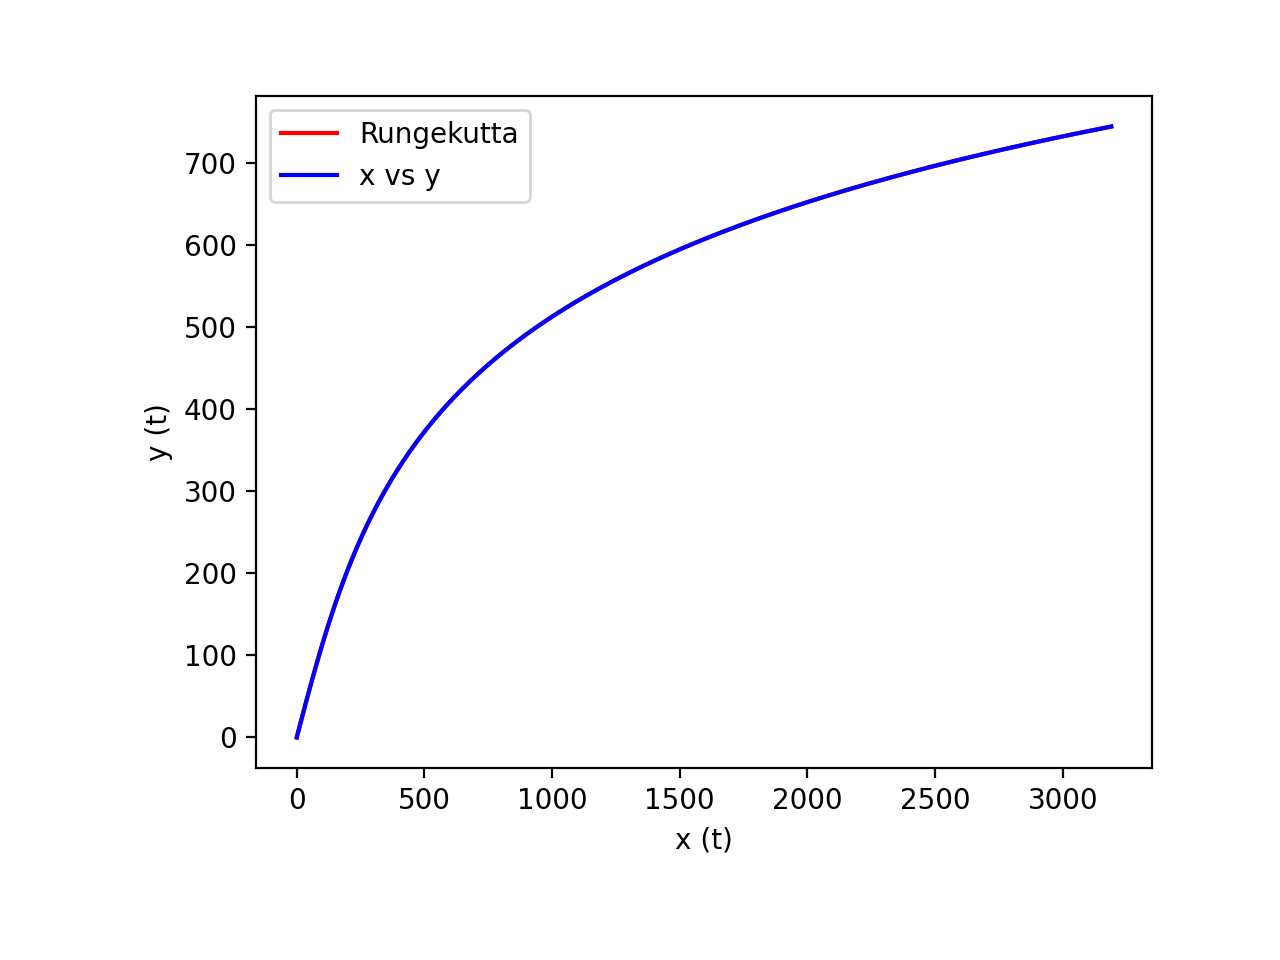

In [215]:
sol_rk_x = rungekutta_x(v_x,t,x0)
sol_rk_y = rungekutta_y(v_y,t,y0,args=[g])
fig = plt.figure("RK4 comparison")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(sol_rk_x[ :,0], sol_rk_y[:,0], 'r', label = r'Rungekutta')
ax.plot(solx_RK45.y[0],soly_RK45.y[0],'b', label='x vs y')
ax.set_xlabel('x (t)')
ax.set_ylabel('y (t)')
ax.legend(loc='best')

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

In [217]:
##You cannot tell them apart, so I would say it is very good. 

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [218]:
d_ = 0.15
gamm = 0.25
c = gamma*d**2
lamd=10000.0

In [219]:
#code
def v2_x(t,x,c,y,m):
    return np.array( [x[1], -1*(c*np.sqrt(x[1]**2+y[1]**2))*x[1]/m ] )

def v2_y(t,y,g,c,x,m):
    return np.array( [y[1], -1*(g)-(c*np.sqrt((x[1]**2)+(y[1]**2))*y[1])/m ] )

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [220]:
#codes
solx2_RK45 = integrate.solve_ivp(v2_x,(t0,tf),x0,method='RK45',t_eval=t, args= [c,y0,mass])
soly2_RK45 = integrate.solve_ivp(v2_y,(t0,tf),y0,method='RK45',t_eval=t, args= [g,c,x0,mass])

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


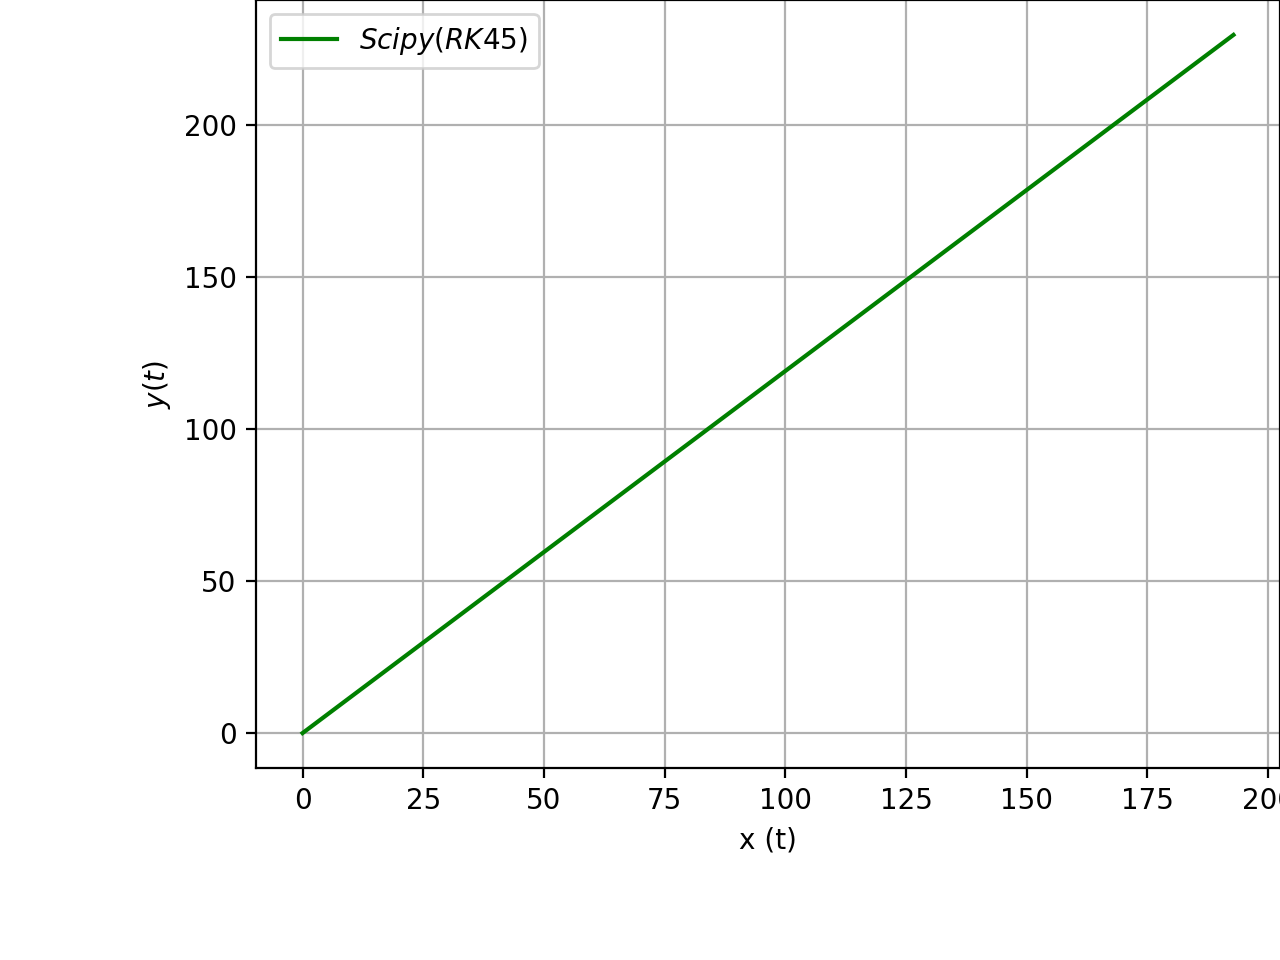

In [221]:
#codes
fig = plt.figure("Trajectory with Friction)")
ax = fig.add_axes([0.2,0.2,0.8,0.8])

ax.plot(solx2_RK45.y[:,0],soly2_RK45.y[:,0],'g', label=r'$Scipy (RK45)$')

ax.legend(loc='best')
ax.set_xlabel('x (t)')
ax.set_ylabel(r'$y (t)$')
ax.grid();

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

Code the equations into a function

In [228]:
#code
def v3_x(t,x,gamma,d,y,lam,m):
    return np.array( [x[1], -(((gamma*d**2)*np.exp(1*y[0]/lam)*math.sqrt(x[1]**2+y[1]**2))*x[1])/m ] )

def v3_y(t,y,g,gamma,d,lam,x,m):
    return np.array( [y[1], -1*(g)-(((gamma*d**2)*np.exp(1*y[0]/lam)*math.sqrt(x[1]**2+y[1]**2))*y[1])/m ] )

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [229]:
#codes
solx3_RK45 = integrate.solve_ivp(v3_x,(t0,tf),x0,method='RK45',t_eval=t, args= [gamm,d_,y0,lamd,mass])
soly3_RK45 = integrate.solve_ivp(v3_y,(t0,tf),y0,method='RK45',t_eval=t, args= [g,gamm,d_,lamd,x0,mass])

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


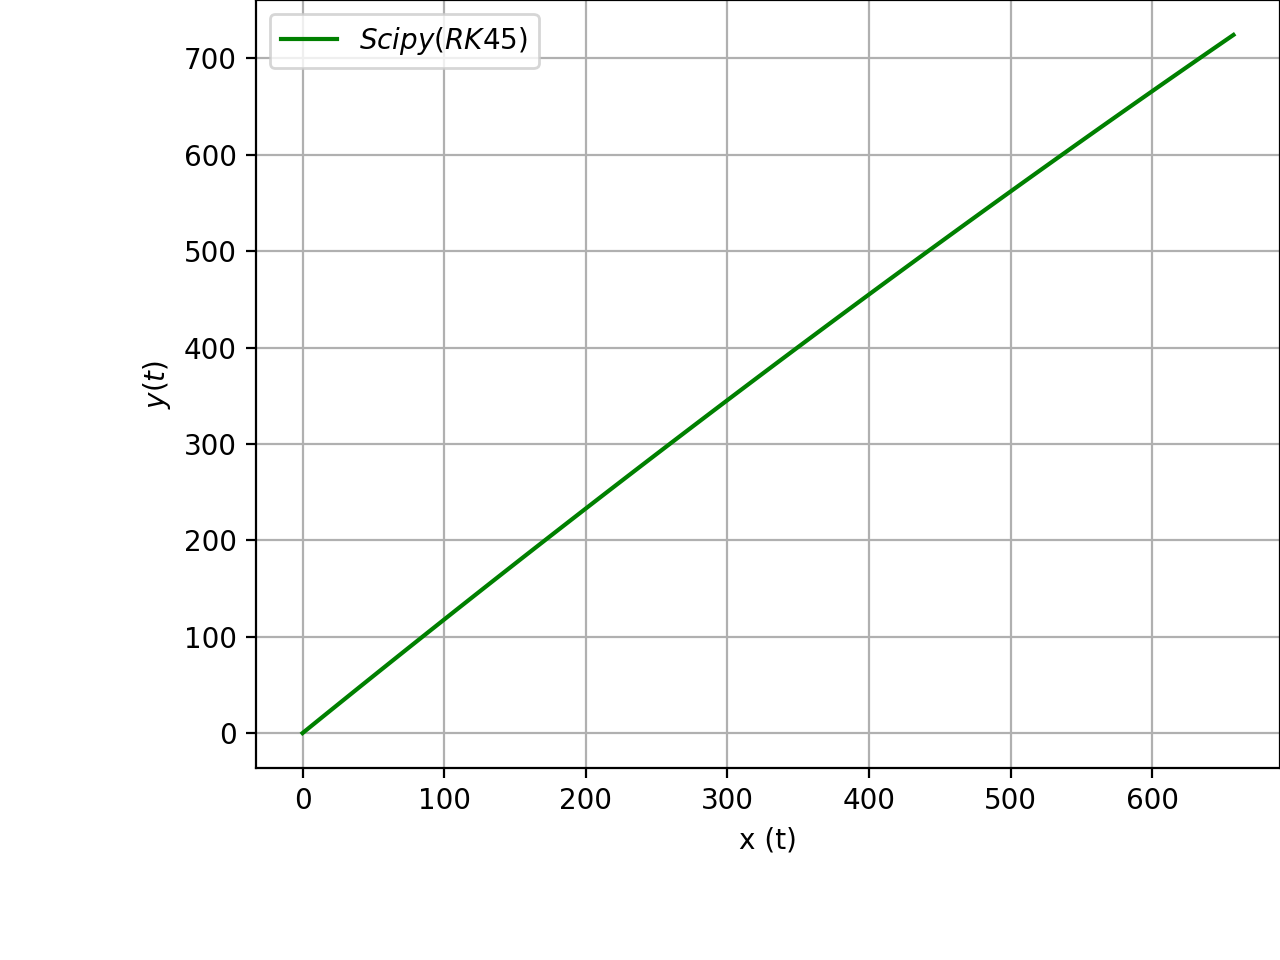

In [230]:
#codes
fig = plt.figure("Trajectory with Friction and c(y))")
ax = fig.add_axes([0.2,0.2,0.8,0.8])

ax.plot(solx3_RK45.y[0],soly3_RK45.y[0],'g', label=r'$Scipy (RK45)$')

ax.legend(loc='best')
ax.set_xlabel('x (t)')
ax.set_ylabel(r'$y (t)$')
ax.grid();

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


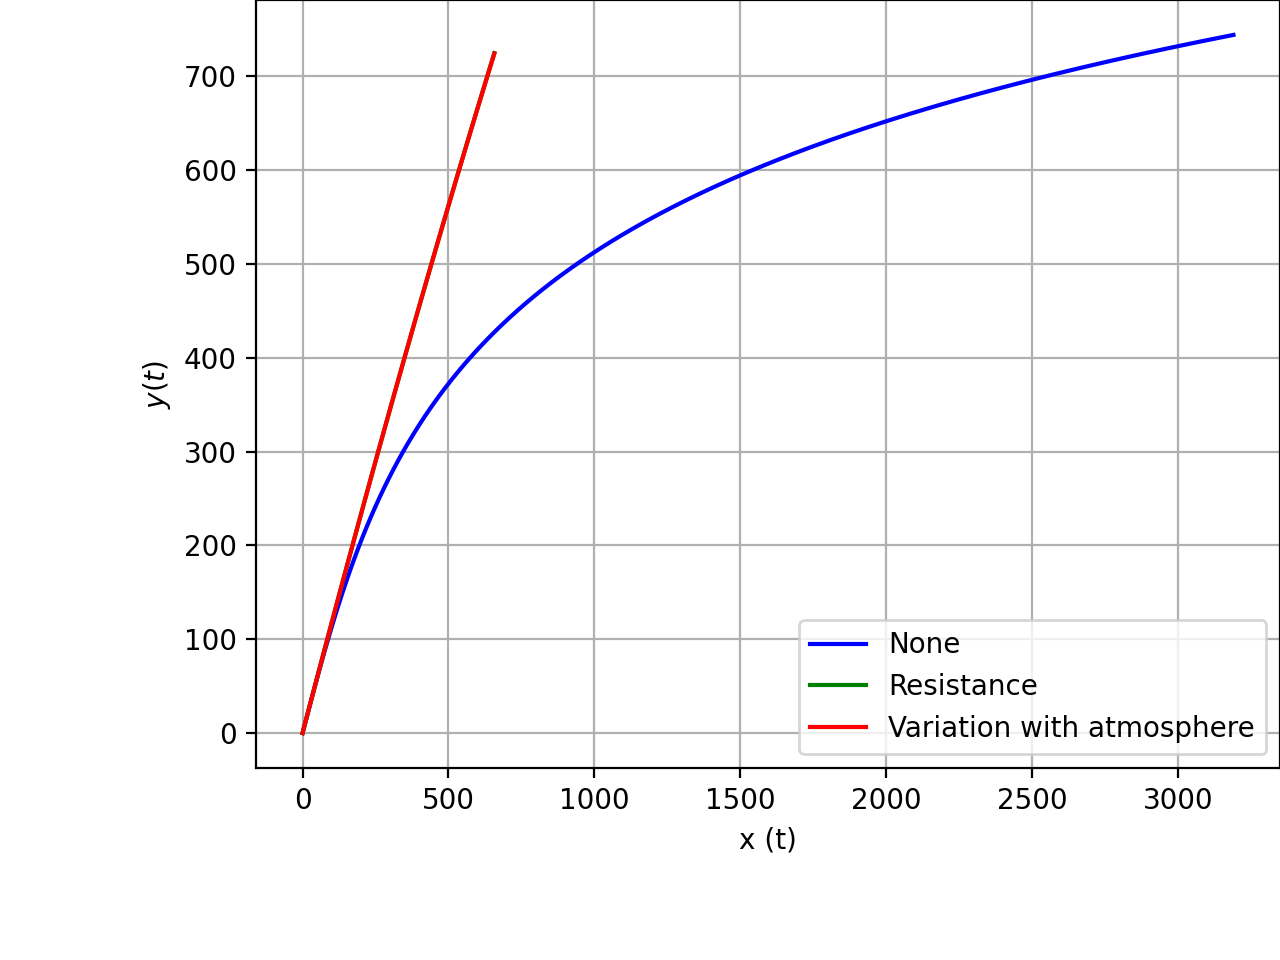

In [231]:
#codes
fig = plt.figure("A B and C")
ax = fig.add_axes([0.2,0.2,0.8,0.8])

ax.plot(solx_RK45.y[0],soly_RK45.y[0],'b', label='None')
ax.plot(solx2_RK45.y[0],soly2_RK45.y[0],'g', label=r'Resistance')
ax.plot(solx3_RK45.y[0],soly3_RK45.y[0],'r', label=r'Variation with atmosphere')

ax.legend(loc='best')
ax.set_xlabel('x (t)')
ax.set_ylabel(r'$y (t)$')
ax.grid();

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

In [226]:
##Variation with athmosphere 